
*Name*: Chase Carlson

# HW 7 Worked Problem: Cluster Analysis

# Preliminaries

Import datetime:

In [98]:
from datetime import datetime as dt
now = dt.now()
print("Analysis on", now.strftime("%Y-%m"), "at", now.strftime("%H:%M %p"))

Analysis on 2023-08 at 16:44 PM


Establish current working directory:

In [99]:
import os
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

Import libraries:

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The following data file contains information on 4000 delivery trips via company vans. Recorded is the Trip ID, the miles driven, and percentage of the time the driver was more than 5mph over the speed limit. (Problem #13 short answer)

Data: http://web.pdx.edu/~gerbing/data/Drivers.csv

You are tasked with analyzing drivers who transport materials to various points in your supply chain. Because drivers are driving company trucks, you can collect real-time information regarding their driving habits for each trip. One analysis is of the variables (a) distance driven in miles and (b) percentage of the time the driver was driving over 5mph of the speed limit. 

Are there specific types of trips that can be categorized according to distance driven and speeding?

*a. Read the data into a data frame, display its basic characteristics.*

In [101]:
df = pd.read_csv('http://web.pdx.edu/~gerbing/data/Drivers.csv')
df.shape

(4000, 3)

The data frame has 4000 rows and 3 columns.

In [102]:
df.head()

,Driver_ID,Distance,Speeding
0,1935,71.24,28.0
1,3212,52.53,25.0
2,3724,64.54,27.0
3,1373,55.69,22.0
4,999,54.58,25.0


Confirm Driver_ID contains unique values:

In [103]:
df['Driver_ID'].nunique()

4000

Since all values seem to be unique, the name "Driver_ID" doesn't make sense as there would be repeating values if this referred to actual drivers. I am going to rename the Driver_ID column to Trip_ID to be consistent with the name provided in the instructions:

In [104]:
df.rename(columns={'Driver_ID': 'Trip_ID'}, inplace=True)
df.head()

,Trip_ID,Distance,Speeding
0,1935,71.24,28.0
1,3212,52.53,25.0
2,3724,64.54,27.0
3,1373,55.69,22.0
4,999,54.58,25.0


*b. Create the X data structure for this cluster analysis.*

Isolate Distance and Speeding as the features:

In [105]:
X = df[['Distance', 'Speeding']]
X.head()

,Distance,Speeding
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


In [127]:
n_features = X.shape[1]
print('Number of features:', n_features)

Number of features: 2


*c. Missing data check.*

In [106]:
print(df.isna().sum())
print('\nTotal Missing:', df.isna().sum().sum())

Trip_ID     0
Distance    0
Speeding    0
dtype: int64

Total Missing: 0


*d. Standardize the data.*

Access the StandardScaler algorithm from sklearn and transform the variables:

In [107]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
s_scaler = preprocessing.StandardScaler()
X = s_scaler.fit_transform(X)

*e. Verify the standardization.*

In [108]:
X = pd.DataFrame(X, columns=['Distance', 'Speeding'])
X.head()

,Distance,Speeding
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744


In [109]:
X.describe().round(3)

,Distance,Speeding
count,4000.000,4000.000
mean,0.000,0.000
std,1.000,1.000
min,-1.132,-0.782
25%,-0.576,-0.490
50%,-0.425,-0.344
75%,-0.195,-0.126
max,3.156,6.513


*f. Do a hyper-parameter tuning from 2 to 15 clusters to help determine the number of clusters that best describe this data set. Compute inertia and silhouette for each model.*

Import required modules:

In [110]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score

Set max number of clusters to 15, and define empty arrays for inertia and silhouette:

In [111]:
max_nc = 15
inertia = []
silhouette = []

In [112]:
for i in range(2, max_nc):
    model = KMeans(n_clusters=i, init='k-means++', n_init=100, random_state=1) 
    model.fit(X)
    inertia.append(model.inertia_)
    s_score = metrics.silhouette_score(X, model.labels_, metric='euclidean')
    silhouette.append(s_score)

*g. Create a table of inertia and the silhouette index for each model.*

Display the Silhouette and Inertial for each model:

In [113]:
print('{:>2}{:>11}{:>9}'.format('nc', 'Silhouette', 'Inertia'))
print('-' * 24)
for i in range(2, max_nc):
    print('{:>2d}{:>8.3f}{:>12.3f}'.format(i, silhouette[i-2], inertia[i-2]))

nc Silhouette  Inertia
------------------------
 2   0.708    3911.926
 3   0.764    1756.545
 4   0.784     739.153
 5   0.734     619.404
 6   0.734     502.037
 7   0.664     437.872
 8   0.360     374.420
 9   0.360     336.926
10   0.360     305.542
11   0.354     274.831
12   0.348     246.746
13   0.347     227.781
14   0.349     210.306


*h. Create a plot of inertia and a plot of silhouette for each model.*

Create plot for Inertia:

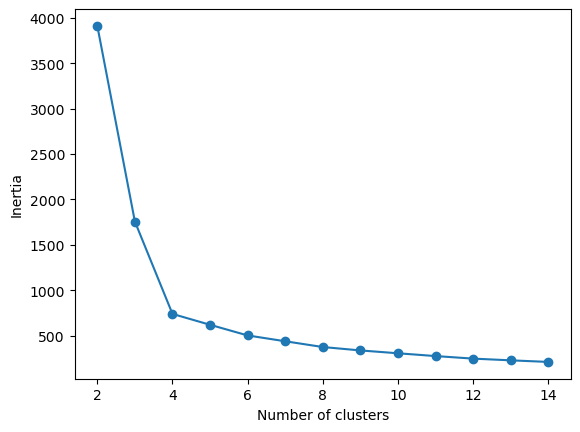

In [114]:
plt.plot(range(2, max_nc), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Create plot for Silhouette:

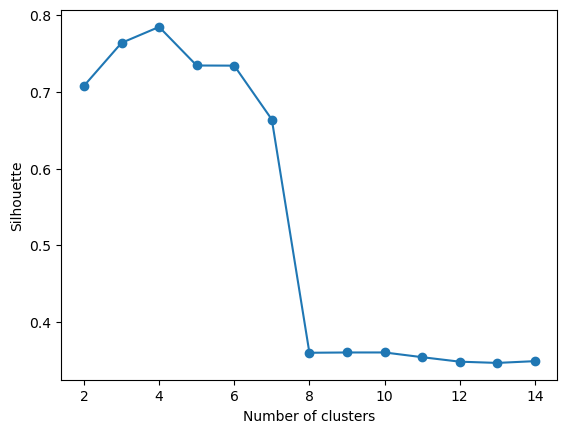

In [115]:
plt.plot(range(2, max_nc), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

*i. What appears to be the optimal number of clusters? Why?*

Based on my interpretation of the two visualizations, where we are looking for the optimal combination of low inertia and high silhouette, 4 clusters seems to provide the best fit for this analysis. Four clusters is a good fit because the inertia drop off becomes much smaller after 4 clusters, and it provides the highest silhouette of all models.

*j. Do the cluster analysis just for the optimal number of clusters.*

In [116]:
model = KMeans(n_clusters=4, init='k-means++', n_init=100, random_state=1)
model.fit(X)

KMeans(n_clusters=4, n_init=100, random_state=1)

*k. Evaluate fit just for this one cluster analysis.*

In [117]:
s_score = metrics.silhouette_score(X, model.labels_, metric='euclidean')
print('Inertia: %.3f ' % model.inertia_)
print('Mean silhouette score: %.3f' % s_score)

Inertia: 739.153 
Mean silhouette score: 0.784


*l. Construct the histogram of the individual silhouette coefficients. Comment on fit.*

Text(0, 0.5, 'Count')

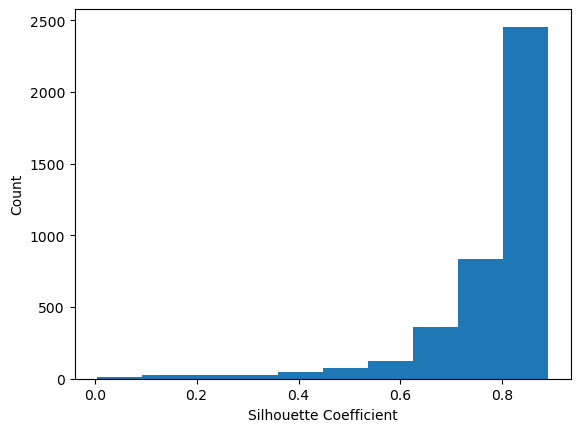

In [118]:
s_values = silhouette_samples(X, model.labels_)
plt.hist(s_values.round(3))
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Count')

The four cluster solution fits the data well. There are no negative silhouette values, and most values are above 0.6.

*m. Assign the cluster membership and corresponding silhouette score to each sample in the data frame of the original data.*

In [119]:
df['Cluster'] = model.labels_
df['S'] = s_values.round(3)
df.head()

,Trip_ID,Distance,Speeding,Cluster,S
0,1935,71.24,28.0,2,0.574
1,3212,52.53,25.0,2,0.532
2,3724,64.54,27.0,2,0.577
3,1373,55.69,22.0,2,0.335
4,999,54.58,25.0,2,0.529


*n. How many samples are in each cluster?*

In [120]:
df_lab = pd.DataFrame(model.labels_, columns=['labels'])
count = df_lab['labels'].value_counts()
count

0    2774
1     695
2     427
3     104
Name: labels, dtype: int64

*o. Show the standardized cluster centers. Interpret.*

In [121]:
dcc = pd.DataFrame(model.cluster_centers_,
columns=['Distance', 'Speeding']).round(3)
dcc['Count'] = count
dcc.sort_values('Count', ascending=False)

,Distance,Speeding,Count
0,-0.487,-0.402,2774
1,1.953,-0.014,695
2,-0.480,1.579,427
3,1.904,4.346,104


*p. Get the cluster centroids for the original, unstandardized data.*

In [122]:
avg = df.groupby(df['Cluster'])[['Distance', 'Speeding']].mean().round(2)
df_avg = pd.DataFrame(avg, columns=['Distance', 'Speeding']).round(3)
df_avg['Count'] = count
df_avg = df_avg.sort_values('Count', ascending=False)
#d_avg.to_excel("ClustCenters.csv", header=True)
df_avg

,Distance,Speeding,Count
Cluster,,,
0,50.02,5.20,2774
1,180.43,10.53,695
2,50.40,32.37,427
3,177.84,70.29,104


In [123]:
print('Distance difference:',
(df_avg.loc[1,'Distance'] - df_avg.loc[0,'Distance']).round(3))
print('Speeding difference: ',
(df_avg.loc[1,'Speeding'] - df_avg.loc[0,'Speeding']).round(3))

Distance difference: 130.41
Speeding difference:  5.33


*q. Plot the scatterplot of the data and the cluster centroids.*

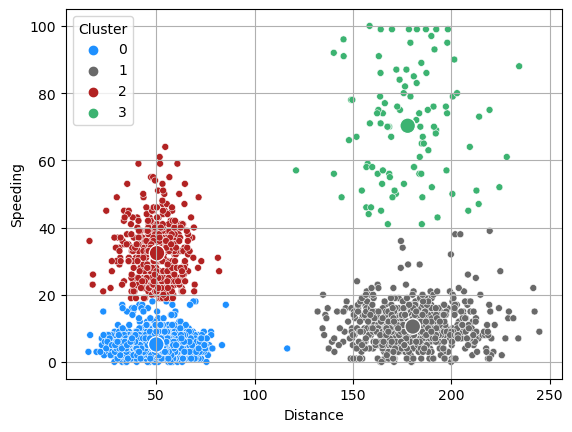

In [135]:
if n_features == 2:
    sns.scatterplot(x=df['Distance'], y=df['Speeding'], s=25,
                    hue=df['Cluster'], palette={0: 'dodgerblue', 1: 'dimgray', 2: 'firebrick', 3: 'mediumseagreen'})
    
    # Reset the index of df_avg to get the color mapping to work properly
    df_avg_reset = df_avg.reset_index()
    
    sns.scatterplot(x=df_avg_reset['Distance'], y=df_avg_reset['Speeding'], s=125, hue=df_avg_reset['Cluster'], 
                    palette= {0: 'dodgerblue', 1: 'dimgray', 2: 'firebrick', 3: 'mediumseagreen'}, legend=False)
    plt.grid()

*r. Interpret the cluster solution.*

Based on the result of the cluster solution, each trip ID can be classified into 4 distinct clusters:
1. Low distance, low speed: This cluster indicates shorter distances with relatively low speed, which might be trips to deliver in urban neighborhoods with several stops within a short distance or heavier loads. These drivers tend to stay within the speed limits most often.
2. Low distance, high speed: This cluster indicates shorter distances with higher speeds, which could likely capture return trips or deliveries within urban areas where the delivery vans spend more time on highways, or are able to travel faster due to lighter loads. These drivers tend to spend more time speeding than cluster 1.
3. High distance, low speed: This cluster might describe longer delivery routes that serve large rural areas. These drivers tend to stay within the speed limits.
4. High distance, high speed: This cluster might represent delivery routes in rural areas where trips between deliveries are much farther apart and trucks spend spend more time on low traffic roads between destinations.